In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.filterwarnings('ignore')

## 1. 데이터셋 가져오기

In [2]:
loan_train = pd.read_csv('./datasets/loan-train.csv')
loan_test = pd.read_csv('./datasets/loan-test.csv')

## 2. 데이터 탐색

### 2.1 데이터 살펴보기

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**특성의 의미**
~~~
'Loan_ID' : ID
'Gender' : 성별 (Male / Female)
'Married' : 기혼 여부 (Yes / No)
'Dependents' : 부양가족 수 (0 / 1 / 2 / 3+)
'Education' : 졸업 여부 (Graduate / Not Graduate)
'Self_Employed' : 자영업(Y/N)
'ApplicantIncome' : 신청자의 수입
'CoapplicantIncome' : 공동신청자의 수입
'LoanAmount' : 대출액 금액
'Loan_Amount_Term' : 대출 기간
'Credit_History' : 신용 (0.0 / 1.0)
'Property_Area' : 지역 (Urban / Semi Urban / Rural)
'Loan_Status' : 대출 승인 여부 (Y/N)
~~~

In [6]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 2.2 데이터 분석

In [8]:
# train data 대출 승인률 (약 69%)
loan_prob = len(loan_train.loc[loan_train['Loan_Status']=='Y']) / len(loan_train)
loan_prob

0.6872964169381107

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

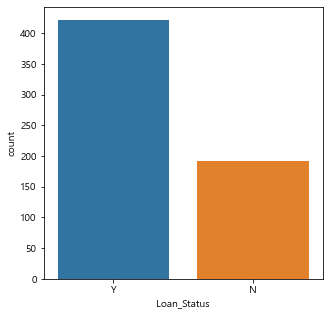

In [9]:
# target인 Loan_Status 확인(위와 같음)
plt.figure(figsize=(5,5))
sns.countplot(loan_train['Loan_Status'])

In [10]:
# 대출 신청자 평균 소득: 5403 달러 
loan_train['ApplicantIncome'].sum() / 614 

5403.459283387622

(array([353., 180.,  44.,  15.,  12.,   3.,   0.,   0.,   1.,   3.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  150. ,  4192.5,  8235. , 12277.5, 16320. , 20362.5, 24405. ,
        28447.5, 32490. , 36532.5, 40575. , 44617.5, 48660. , 52702.5,
        56745. , 60787.5, 64830. , 68872.5, 72915. , 76957.5, 81000. ]),
 <BarContainer object of 20 artists>)

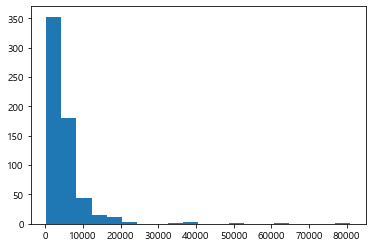

In [11]:
# 대출 신청자 소득 분포 (1만 달러 미만에 많이 분포함)
plt.hist(loan_train['ApplicantIncome'], bins=20)

In [12]:
# 대출 보증인(공동신청자) 평균 소득: 1621 달러 
loan_train['CoapplicantIncome'].sum() / 614 

1621.2457980271008

(array([434., 127.,  36.,  10.,   1.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([    0.  ,  2083.35,  4166.7 ,  6250.05,  8333.4 , 10416.75,
        12500.1 , 14583.45, 16666.8 , 18750.15, 20833.5 , 22916.85,
        25000.2 , 27083.55, 29166.9 , 31250.25, 33333.6 , 35416.95,
        37500.3 , 39583.65, 41667.  ]),
 <BarContainer object of 20 artists>)

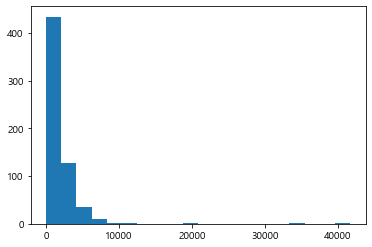

In [13]:
# 대출 보증인(공동신청자) 소득 분포 (5천 달러 미만에 많이 분포함)
plt.hist(loan_train['CoapplicantIncome'], bins=20)

(array([ 12.,  60., 142., 168.,  90.,  53.,  15.,  18.,  10.,   5.,   4.,
          2.,   1.,   4.,   3.,   0.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <BarContainer object of 20 artists>)

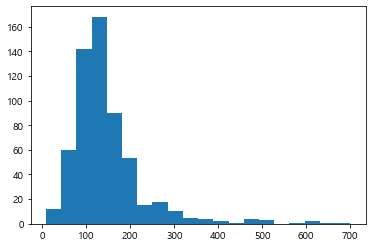

In [14]:
# 대출금액(1000단위, 데이터값이 100K~200K에 몰려있음)
plt.hist(loan_train['LoanAmount'], bins=20)

(array([  1.,   2.,   2.,   4.,   3.,   0.,   0.,  44.,   0.,   4.,   0.,
          0.,  13.,   0., 512.,   0.,   0.,   0.,   0.,  15.]),
 array([ 12. ,  35.4,  58.8,  82.2, 105.6, 129. , 152.4, 175.8, 199.2,
        222.6, 246. , 269.4, 292.8, 316.2, 339.6, 363. , 386.4, 409.8,
        433.2, 456.6, 480. ]),
 <BarContainer object of 20 artists>)

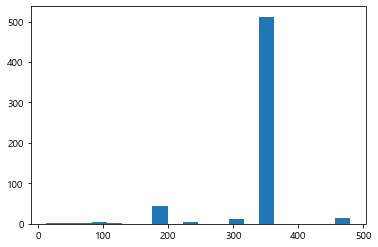

In [15]:
# 대출 기간 (30년이 압도적으로 많음)
plt.hist(loan_train['Loan_Amount_Term'], bins=20)

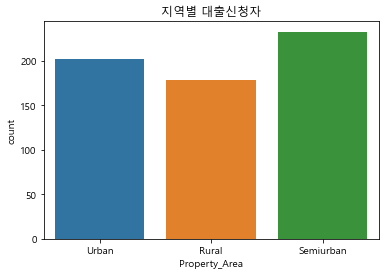

In [16]:
# 지역별 대출신청자 - Semiurban이 제일 많음
sns.countplot(x='Property_Area', data=loan_train)
plt.title('지역별 대출신청자')
plt.show()

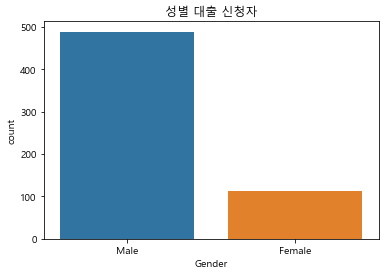

In [17]:
# 대출받는 남성/여성? (Gender) - 남성이 압도적으로 많음
sns.countplot(x='Gender', data=loan_train)
plt.title('성별 대출 신청자')
plt.show()

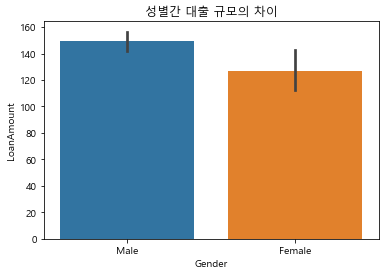

In [18]:
# 남성/여성의 대출 규모가 다를까? (Gender & LoanAmount)
sns.barplot(x='Gender', y='LoanAmount', data=loan_train)
plt.title('성별간 대출 규모의 차이')
plt.show()

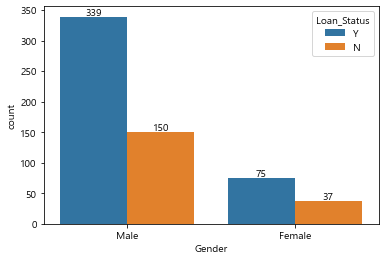

In [19]:
# 대출 가능 여부도 성별로 다를까? (Gender & Loan_Status) - 남성 69%, 여성 67%로 거의 차이 없음
ax = sns.countplot(x='Gender', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

In [20]:
loan_train.groupby("Gender").count()["Loan_Status"]

Gender
Female    112
Male      489
Name: Loan_Status, dtype: int64

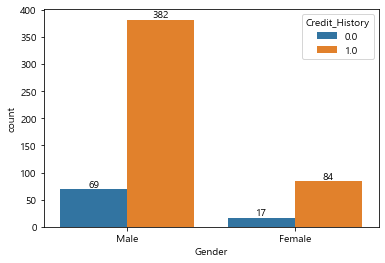

In [21]:
# 성별 신용도 조건 충족 여부 (Gender & Credit_History) - 남성 85%, 여성 83%로 비등함
ax = sns.countplot(x='Gender', hue='Credit_History', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

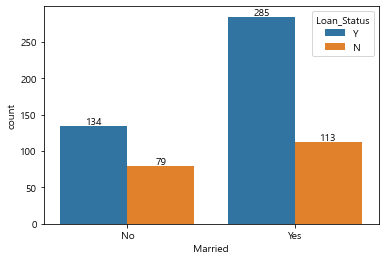

In [22]:
# 기혼자의 경우 대출이 조금 더 쉽게 나올까? (Married & Loan_Status) - 기혼자 71%, 미혼자 63%로 기혼자가 더 수월하게 대출을 받음
ax = sns.countplot(x='Married', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

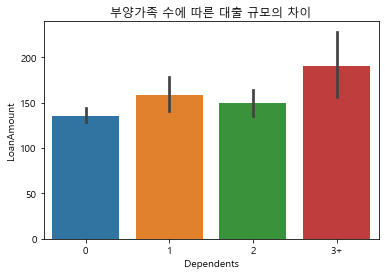

In [23]:
# 부양가족이 있으면 대출 규모가 더 커질까? (Dependents & LoanAmount) - 양의 상관관계가 조금 있어보임
sns.barplot(x='Dependents', y='LoanAmount', data=loan_train)
plt.title('부양가족 수에 따른 대출 규모의 차이')
plt.show()

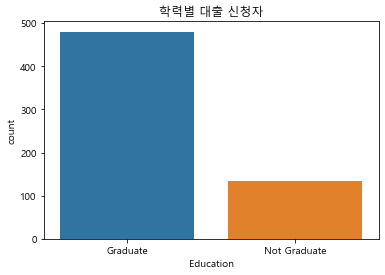

In [24]:
# 대졸자/대졸미만자의 대출 신청 수 - 대졸자가 압도적으로 많음
sns.countplot(x='Education', data=loan_train)
plt.title('학력별 대출 신청자')
plt.show()

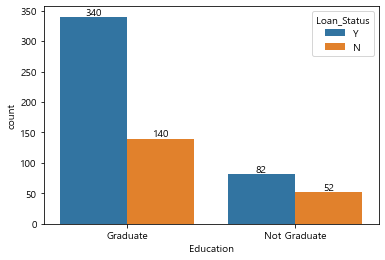

In [25]:
# 대졸자의 경우 대출이 더 쉽게 나올까? (Education & Loan_Status) - 대졸자 71%, 대졸미만 61%로 대졸자가 더 유리해보임
ax = sns.countplot(x='Education', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

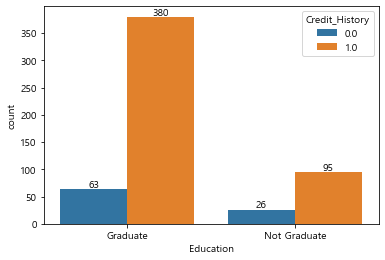

In [26]:
# 대졸자/대졸미만자의 신용도 조건 충족 여부? - 대졸자 86%, 대졸미만자 79%로 대졸자가 조금 더 신용도 조건을 충족했음. 다만 신용도는 결측치가 많은 피쳐이므로 이를 참고해야 함
ax = sns.countplot(x='Education', hue='Credit_History', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

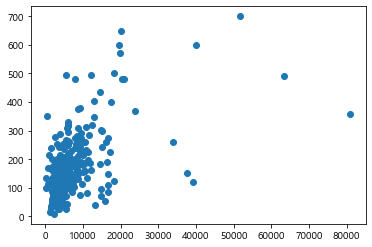

In [27]:
# 소득이 많을수록 대출하고자 하는 금액이 클까? (ApplicantIncome & LoanAmount) - 불분명함
plt.scatter(loan_train['ApplicantIncome'], loan_train['LoanAmount'])
plt.show()

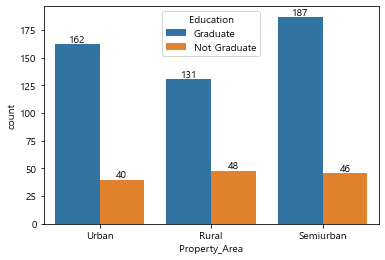

In [28]:
# 사는 지역에 따라 대졸 여부가 다를까? (Property_Area & Education) - Semiurban에서 대졸자/대졸미만자 차이가 제일 두드러짐
ax = sns.countplot(x='Property_Area', hue='Education', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

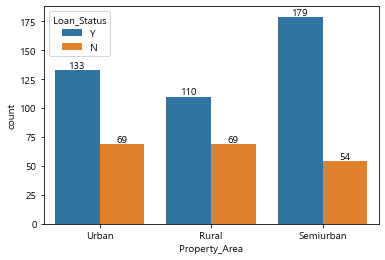

In [29]:
# 사는 지역에 따라 대출 승인 여부가 다를까? (Property_Area & Loan_Status) - Urban 66%, Rural 61%, Semiurban 77%
ax = sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

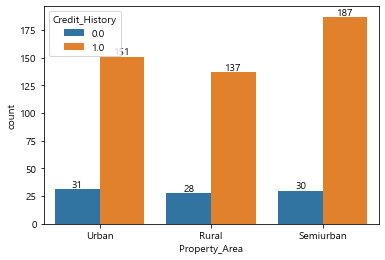

In [30]:
# 사는 지역에 따른 신용도 조건 충족 여부? (Property_Area & Credit_History) - Urban 83%, Rural 83%, Semiurban 86%
ax = sns.countplot(x='Property_Area', hue='Credit_History', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

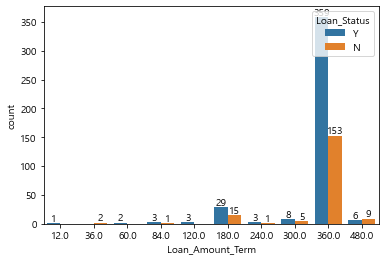

In [31]:
# 대출 기간과 대출 여부에 상관관계가 있을까? (Loan_Amount_Term & Loan_Status) - 대출 승인비가 40년 신청 전후로 나뉨
ax = sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

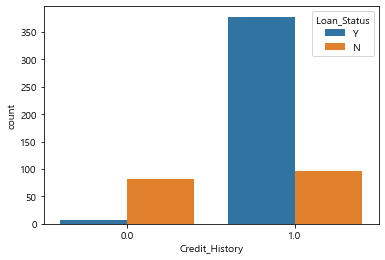

In [32]:
# 신용도 충족에 따른 대출 승인 여부
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_train)

### 2.3 결측치 확인

In [33]:
import missingno as msno

In [34]:
# train data - 7개 feature
loan_train.isnull().sum().sort_values(ascending=False)


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

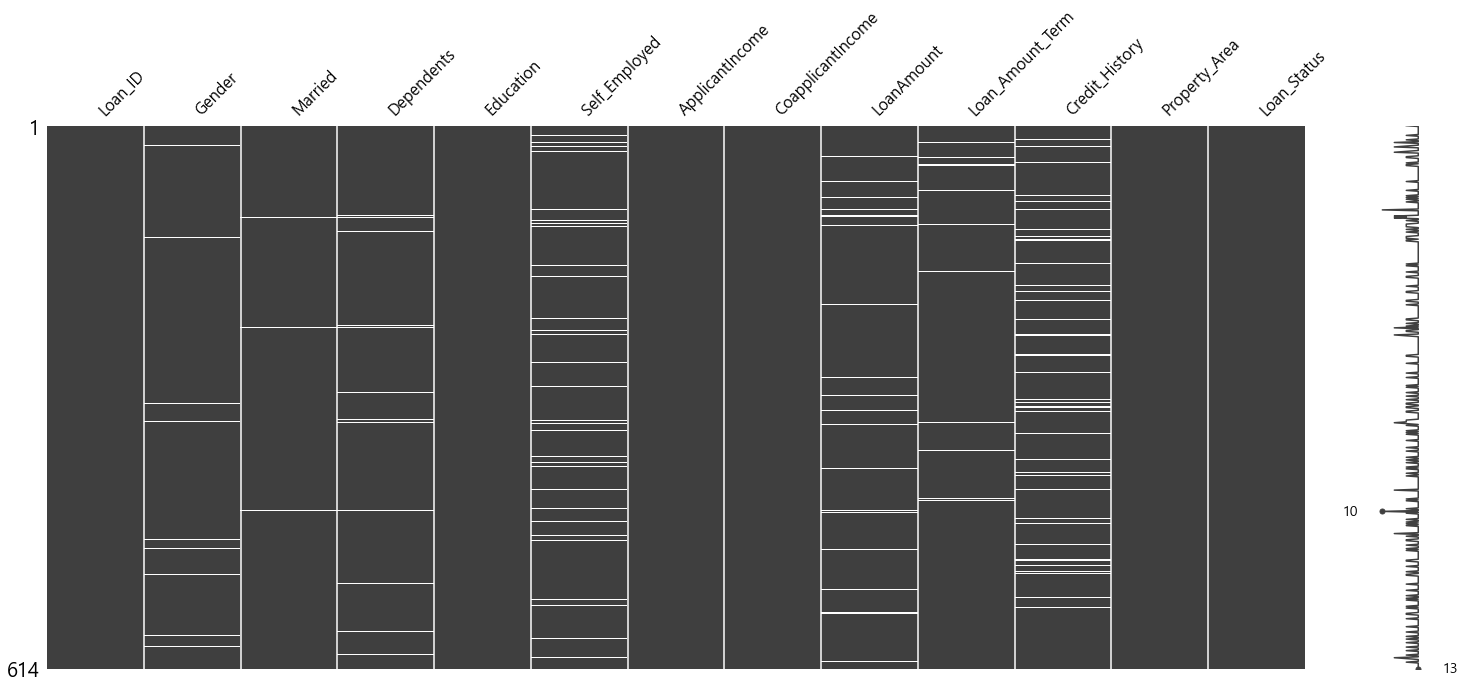

In [35]:
msno.matrix(loan_train)

In [36]:
# test data - 6개 feature
loan_test.isnull().sum().sort_values(ascending=False)


Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

<AxesSubplot:>

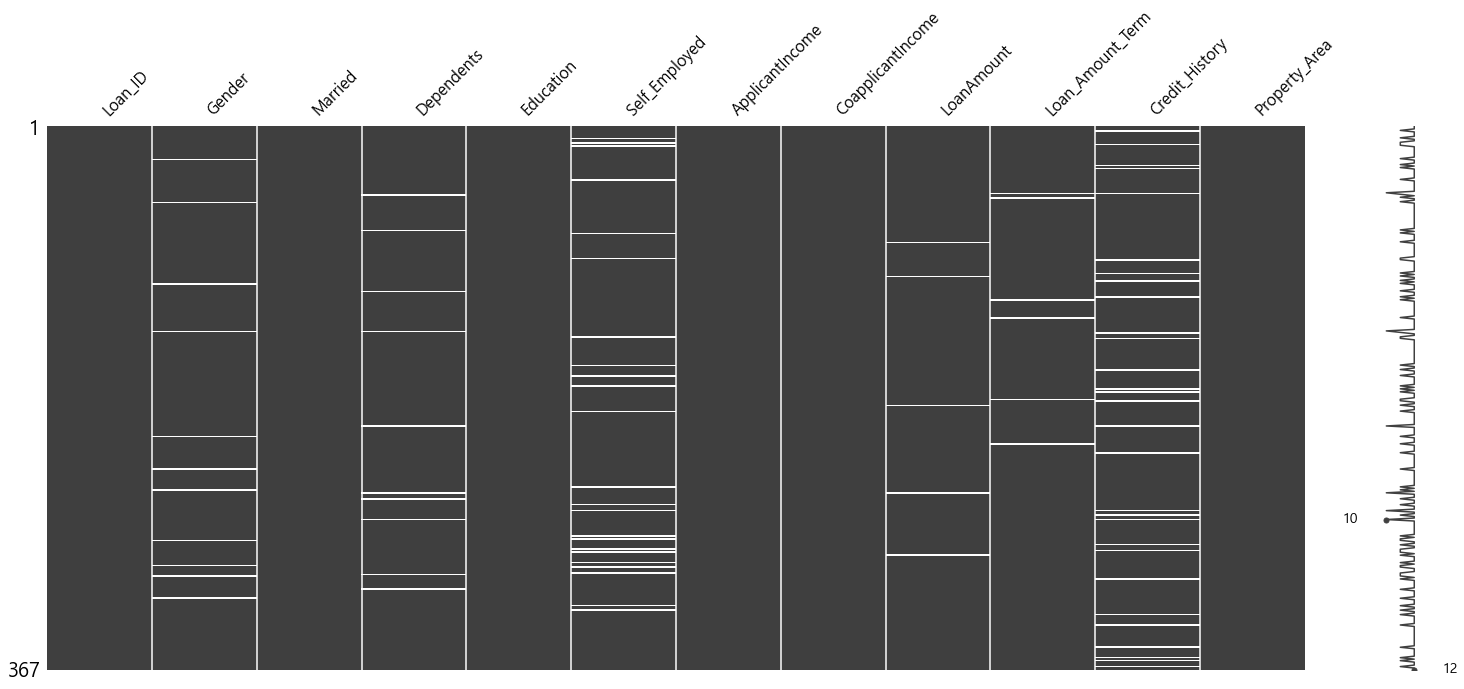

In [37]:
msno.matrix(loan_test)

## 3. 데이터 전처리

### 3.1 특성 제거

In [38]:
print(loan_train.shape)
loan_test.shape

(614, 13)


(367, 12)

In [39]:
# Loan_ID 컬럼 제거
loan_train.drop('Loan_ID', axis=1, inplace=True)
loan_test.drop('Loan_ID', axis=1, inplace=True)

In [40]:
print(loan_train.shape)
loan_test.shape

(614, 12)


(367, 11)

In [41]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### 3.2 데이터 변환

In [42]:
# categorical feature(8)
'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'
'Credit_History', 'Property_Area', 'Loan_Status(test X)'
# 결측 데이터(5)
'Gender', 'Married(test X)', 'Dependents', 'Self_Employed', 'Credit_History'

# Numerical feature(4)
'ApplicantIncome', 'CoapplicantIncome', 
'LoanAmount', 'Loan_Amount_Term'
# 결측 데이터(2)
'LoanAmount', 'Loan_Amount_Term'

('LoanAmount', 'Loan_Amount_Term')

**변환 :    문자형 -> 수치형**
```
1. Gender --------------> Male/ Female
-> 1/0
2. Married --------------> Applicant married (Y/N)
-> 1/0
3. Education -------------> Applicant Education (Graduate/ Under Graduate)
-> 1/0
4. Self_Employed ---------> Self-employed (Y/N)
-> 1/0
5. Loan_Status -----------> Loan approved (Y/N)
-> 1/0

1. Dependents ------------> Number of dependents
-> 원핫인코딩
2. Property_Area ---------> Urban/ Semi-Urban/ Rural
-> 원핫인코딩

```

In [43]:
# 변환 : categorical(object) -> numerical
# loan_train(5)  --> Credit_History(not object), Property_Area,(원핫), Dependents(원핫)
loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_train.Married = loan_train.Married.replace({"Yes":1, "No":0})
loan_train.Education = loan_train.Education.replace({"Graduate":1, "Not Graduate":0})
loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes":1, "No":0})
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y":1, "N":0})

# loan_test(4)
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Married = loan_test.Married.replace({"Yes":1, "No":0})
loan_test.Education = loan_test.Education.replace({"Graduate":1, "Not Graduate":0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes":1, "No":0})

### 3.3 결측치 채우기

In [44]:
# train data
# categorical data (mode : 최빈값)
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

# numerical data (mean : 평균값)
# 'LoanAmount', 'Loan_Amount_Term'
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(), inplace=True)

In [45]:
# test data
# categorical data (mode : 최빈값)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

# numerical data (mean : 평균값)
# 'LoanAmount', 'Loan_Amount_Term'
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mean(), inplace=True)

In [46]:
# train data 확인
loan_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
# test data 확인
loan_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 3.4 원핫인코딩

In [48]:
loan_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [49]:
loan_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [50]:
# Dependents, Property_Area 원핫인코딩
dummies1 = pd.get_dummies(loan_train['Dependents'], prefix='Dependents')
loan_train = pd.concat([loan_train, dummies1], axis=1)

dummies2 = pd.get_dummies(loan_test['Dependents'], prefix='Dependents')
loan_test = pd.concat([loan_test, dummies2], axis=1)

dummies3 = pd.get_dummies(loan_train['Property_Area'], prefix='Property_Area')
loan_train = pd.concat([loan_train, dummies3], axis=1)

dummies4 = pd.get_dummies(loan_test['Property_Area'], prefix='Property_Area')
loan_test = pd.concat([loan_test, dummies4], axis=1)

In [51]:
# 기존 컬럼 Dependents, Property_Area 삭제
loan_train = loan_train.drop(columns=['Dependents', 'Property_Area'], axis=1)
loan_test = loan_test.drop(columns=['Dependents', 'Property_Area'], axis=1)

In [52]:
# 특성 최종 버전
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
 14  Property_Area_Rural      6

### 3.5 Target과의 상관계수 확인

<AxesSubplot:>

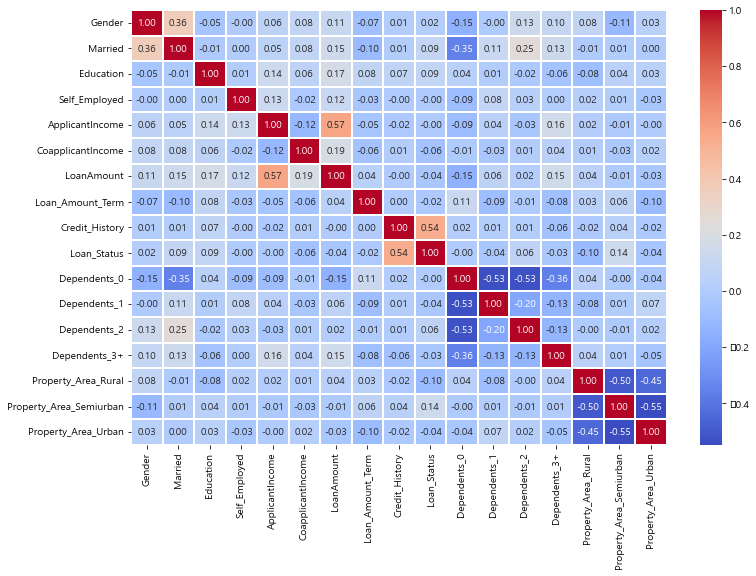

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(),cmap='coolwarm', annot=True, fmt='.2f', linewidths=.1)
# Credit_History(0.54), Semiurban(0.14), Rural(-0.10), 
# Married(0.09), Education(0.09), Dependents2(0.06), 
# CoapplicantIncome(-0.06)

In [54]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   367 non-null    float64
 1   Married                  367 non-null    int64  
 2   Education                367 non-null    int64  
 3   Self_Employed            367 non-null    float64
 4   ApplicantIncome          367 non-null    int64  
 5   CoapplicantIncome        367 non-null    int64  
 6   LoanAmount               367 non-null    float64
 7   Loan_Amount_Term         367 non-null    float64
 8   Credit_History           367 non-null    float64
 9   Dependents_0             367 non-null    uint8  
 10  Dependents_1             367 non-null    uint8  
 11  Dependents_2             367 non-null    uint8  
 12  Dependents_3+            367 non-null    uint8  
 13  Property_Area_Rural      367 non-null    uint8  
 14  Property_Area_Semiurban  3

In [55]:
X_train = loan_train.drop(columns='Loan_Status',axis=1).values
y_train = loan_train['Loan_Status'].values

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

In [57]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [58]:
print(svm_clf.score(X_train, y_train))

0.6856677524429967


In [59]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfols=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skfols.split(X_train, y_train):
    clone_clf = clone(svm_clf)
    x_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.6910569105691057
0.3089430894308943
0.6829268292682927
0.45528455284552843
0.3114754098360656


In [60]:
cross_val_score(svm_clf, X_train, y_train, cv=5)

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.6557377 ])

In [61]:
# Credit_History(0.54), Semiurban(0.14), Rural(-0.10), 
# Married(0.09), Education(0.09), Dependents2(0.06), 
# CoapplicantIncome(-0.06)
X_train = loan_train[['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','CoapplicantIncome','Education','Dependents_2']].values
y_train = loan_train['Loan_Status'].values

In [62]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [63]:
print(svm_clf.score(X_train, y_train))

0.7964169381107492


In [64]:
cross_val_score(svm_clf, X_train, y_train, cv=5)

array([0.81300813, 0.74796748, 0.76422764, 0.85365854, 0.75409836])

In [65]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfols=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skfols.split(X_train, y_train):
    clone_clf = clone(svm_clf)
    x_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8130081300813008
0.7723577235772358
0.8048780487804879
0.5853658536585366
0.8032786885245902


### 스케일링

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
temp_col = ['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','Education','Dependents_2']
std_scaler_col = ['CoapplicantIncome']
std_scaler = StandardScaler()

X_train = loan_train[temp_col]
X_train['CoapplicantIncome']=std_scaler.fit_transform(loan_train[std_scaler_col])

In [68]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [69]:
print(svm_clf.score(X_train, y_train))

0.8127035830618893


In [70]:
cross_val_score(svm_clf, X_train, y_train, cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [71]:
X_train_k=X_train.values

In [72]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfols=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skfols.split(X_train_k, y_train):
    clone_clf = clone(svm_clf)
    x_train_folds = X_train_k[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train_k[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8211382113821138
0.8211382113821138
0.8048780487804879
0.7886178861788617
0.8278688524590164


### 그리드 서치

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = [{
    'C': ['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001],
    'tol' : ['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001],
    'max_iter' : ['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001]
    }]
svm_clf = LinearSVC(random_state=42)
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                           return_train_score=True, n_jobs=-1)
%time grid_search.fit(X_train, y_train)

CPU times: total: 2.02 s
Wall time: 14.1 s


GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': ['auto', 'scale', 1000, 100, 10, 1, 0.1, 0.01,
                                0.001, 0.0001],
                          'max_iter': ['auto', 'scale', 1000, 100, 10, 1, 0.1,
                                       0.01, 0.001, 0.0001],
                          'tol': ['auto', 'scale', 1000, 100, 10, 1, 0.1, 0.01,
                                  0.001, 0.0001]}],
             return_train_score=True)

In [75]:
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'tol': 1}

In [76]:
svm_clf_best = LinearSVC(random_state=42, C=10, tol=1000, max_iter=100)
svm_clf_best.fit(X_train, y_train)

LinearSVC(C=10, max_iter=100, random_state=42, tol=1000)

In [77]:
print(svm_clf_best.score(X_train, y_train))

0.7736156351791531


In [78]:
cross_val_score(svm_clf_best, X_train, y_train, cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81147541])

In [79]:
cross_val_score(svm_clf, X_train, y_train, cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

### 불균형한 데이터셋에서 사용하는 K-Fold기법

In [80]:
X_train_k=X_train.values

In [81]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfols=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skfols.split(X_train_k, y_train):
    clone_clf = clone(svm_clf_best)
    x_train_folds = X_train_k[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train_k[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8130081300813008
0.7967479674796748
0.7560975609756098
0.7479674796747967
0.5491803278688525


In [82]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfols=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skfols.split(X_train_k, y_train):
    clone_clf = clone(svm_clf)
    x_train_folds = X_train_k[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train_k[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8211382113821138
0.8211382113821138
0.8048780487804879
0.7886178861788617
0.8278688524590164


### 테스트 데이터 예측

In [83]:
temp_col = ['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','Education','Dependents_2']
std_scaler_col = ['CoapplicantIncome']
std_scaler = StandardScaler()

X_test = loan_test[temp_col]
X_test['CoapplicantIncome']=std_scaler.fit_transform(loan_test[std_scaler_col])

In [84]:
X_test

,Credit_History,Married,Property_Area_Semiurban,Property_Area_Rural,Education,Dependents_2,CoapplicantIncome
0,1.0,1,0,0,1,0,-0.673335
1,1.0,1,0,0,1,0,-0.029848
2,1.0,1,0,0,1,1,0.098849
3,1.0,1,0,0,1,1,0.418877
4,1.0,0,0,0,0,0,-0.673335
...,...,...,...,...,...,...,...
362,1.0,1,0,0,0,0,0.088982
363,1.0,1,0,0,1,0,-0.369180
364,1.0,0,1,0,1,0,0.181644
365,1.0,1,0,1,1,0,0.353241


In [85]:
X_test['Loan_Status']=svm_clf_best.predict(X_test)

In [86]:
X_test

,Credit_History,Married,Property_Area_Semiurban,Property_Area_Rural,Education,Dependents_2,CoapplicantIncome,Loan_Status
0,1.0,1,0,0,1,0,-0.673335,1
1,1.0,1,0,0,1,0,-0.029848,1
2,1.0,1,0,0,1,1,0.098849,1
3,1.0,1,0,0,1,1,0.418877,1
4,1.0,0,0,0,0,0,-0.673335,0
...,...,...,...,...,...,...,...,...
362,1.0,1,0,0,0,0,0.088982,1
363,1.0,1,0,0,1,0,-0.369180,1
364,1.0,0,1,0,1,0,0.181644,1
365,1.0,1,0,1,1,0,0.353241,1


### 특성제거 전후
cross_val_score
전([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.6557377 ])
후([0.81300813, 0.74796748, 0.76422764, 0.85365854, 0.75409836])
StratifiedKFold
전([0.6910569105691057, 0.3089430894308943, 0.6829268292682927, 0.4552845528455284, 0.3114754098360656 ])
후([0.8130081300813008, 0.7723577235772358, 0.8048780487804879, 0.5853658536585366, 0.8032786885245902 ])
### 스케일링 전후
cross_val_score
전([0.81300813, 0.74796748, 0.76422764, 0.85365854, 0.75409836])
후([0.81300813, 0.78048780, 0.78048780, 0.85365854, 0.81967213])
StratifiedKFold
전([0.8130081300813008, 0.7723577235772358, 0.8048780487804879, 0.5853658536585366, 0.8032786885245902 ])
후([0.8211382113821138, 0.8211382113821138, 0.8048780487804879, 0.7886178861788617, 0.8278688524590164 ])
### 하이퍼 파라미터 정제 전후
cross_val_score
전([0.81300813, 0.78048780, 0.78048780, 0.85365854, 0.81967213])
후([0.81300813, 0.78048780, 0.78048780, 0.85365854, 0.81147541])
StratifiedKFold
전([0.8211382113821138, 0.8211382113821138, 0.8048780487804879, 0.7886178861788617, 0.8278688524590164 ])
후([0.8130081300813008, 0.7967479674796748, 0.7560975609756098, 0.7479674796747967, 0.5491803278688525 ])